# Classification Algorithms and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold
* KNN

Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Setting global seed of notebook

In [11]:
np.random.seed(seed=25)

### Task 1: Load Data from 'titanic_clean.csv'

In [13]:
#write code here
data = pd.read_csv("titanic_clean.csv")
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


### One Hot encoding for categorical varaibles

In [14]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [15]:
df=df_OneHot.copy()

### Task 2: Create Independent and Dependent Variables

In [19]:
#write code here
X = df.drop(['PassengerId' , 'Survived'] , axis=1)
Y = df['Survived']

### Task 3: Train Test n Split the data

In [20]:
# Import the library
from sklearn.model_selection import train_test_split

In [21]:
#Write the code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3 , random_state=100)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


In [22]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
69,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
85,4,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
794,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
161,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
815,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
ytrain.head()

69     0
85     0
794    1
161    0
815    0
Name: Survived, dtype: int64

# Logistic Regression

### Creating Model & Training

In [24]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr_model = LogisticRegression(random_state=25)

In [74]:
lr_model.fit(xtrain, ytrain)

C:\Users\Amad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation 

In [27]:
pred = lr_model.predict(xtest)

In [28]:
pred[0:9]

array([0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

Predicting prabability of **0** and **1**

In [29]:
pred_prb = lr_model.predict_proba(xtest)

In [30]:
pred_prb[0:9,0:9]

array([[0.89649692, 0.10350308],
       [0.8452458 , 0.1547542 ],
       [0.478133  , 0.521867  ],
       [0.81454842, 0.18545158],
       [0.57841495, 0.42158505],
       [0.46508821, 0.53491179],
       [0.03565726, 0.96434274],
       [0.52851382, 0.47148618],
       [0.86700973, 0.13299027]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [31]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

### Comparison of Predicted and Actual

In [32]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
205,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
44,4,2,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
821,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
458,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
795,1,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [33]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
205,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.103503,0
44,4,2,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0.154754,0
821,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0.521867,0
458,0,0,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0.185452,0
795,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.421585,0


### Confusion Matrix Play ground

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(ytest, pred)

array([[144,  28],
       [ 14,  82]], dtype=int64)

In [36]:
confusion_matrix(ytest, pred).ravel()

array([144,  28,  14,  82], dtype=int64)

In [37]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,82,14
Not Survived,28,144


### Accuracy

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8432835820895522


In [40]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8432835820895522


### Precision

In [41]:
from sklearn.metrics import precision_score

In [42]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7454545454545455
Precision for 0: 0.9113924050632911


In [43]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7454545454545455


### Recall

In [44]:
from sklearn.metrics import recall_score

In [45]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.8541666666666666
Recall for 0: 0.8372093023255814


In [46]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.8541666666666666


### F1 Score

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7961165048543689
F1 Score for 0: 0.8727272727272727


In [49]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7961165048543689


### Class Distribution in Training Data

In [50]:
ytrain.value_counts()

0    377
1    246
Name: Survived, dtype: int64

### Classification Report

In [51]:
from sklearn.metrics import classification_report

In [52]:
#get report of precision recall and f1 score
print(classification_report(ytest,pred))
#macro avg 

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       172
           1       0.75      0.85      0.80        96

    accuracy                           0.84       268
   macro avg       0.83      0.85      0.83       268
weighted avg       0.85      0.84      0.85       268



In [53]:
import helper_confusion_matrix as helper
helper.conf_matrix(ytest,lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 82                 14
Not Survived             28                144
Accuracy: 84.328
Precision : 74.545
Recall: 85.417
F1 Score : 79.612
TPR: 85.417  FPR: 16.279


### ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [54]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [55]:
tpr, fpr

(0.8541666666666666, 0.16279069767441862)

In [56]:
fpr = 1 - recall_0
tpr, fpr

(0.8541666666666666, 0.16279069767441856)

Defining function to plot ROC AUC Curve

In [57]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [59]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [60]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.8991339631782945

Plotting AUC ROC Curve

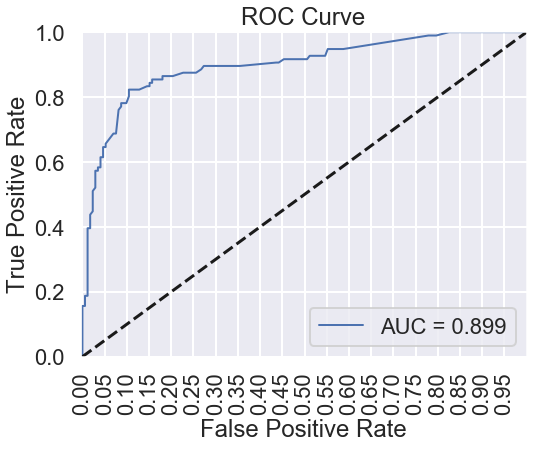

In [61]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [63]:
from sklearn.preprocessing import PolynomialFeatures
acc_train=[]
acc_test=[]

for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = lr_poly.predict(X_tr_poly),lr_poly.predict(X_tst_poly)
   
    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))
    

C:\Users\Amad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [ ]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1,6)), y=acc_test, label='Testing')

# 3. Submission on Kaggle

### Task 4: Import test data

In [67]:
#write code here
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()

### Task 5: Do One Hot encoding of test data

In [68]:
#write code here
df_Onehot = pd.get_dummies(df_test , columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])

In [69]:
df_Onehot.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Task 6: Separate Passenger ID for submission

In [81]:
PassengerID = df_test['PassengerId']

In [70]:
#Write code here
df_sub = df_Onehot.drop('PassengerId',axis=1)

In [71]:
df_sub.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


### Task 7: Do prediction through final model

In [76]:
#write code here
pred_final=lr_model.predict(df_sub)

#### Creating Data Frame for submission

In [82]:
submission=pd.DataFrame({'PassengerId':PassengerID,'Survived':pred_final})

In [91]:
submission.set_index("PassengerId" , inplace=True)

In [92]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


### Task 8: Export the dataset into csv file

In [94]:
# Write code he
submission.to_csv("submission v1.csv")